<a href="https://colab.research.google.com/github/ManciniGa/Aprendizado-Profundo/blob/main/CHATBOT_RG_Escaneamento_de_documentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Projeto 02: Escaneamento de imagem


---
Este projeto combina técnicas de processamento de linguagem natural (NLP) e interface gráfica para criar um chatbot interativo capaz de validar e responder a perguntas sobre informações extraídas de documentos, como CPF, RG e data de emissão. Utilizando o modelo pré-treinado **DistilBERT**, especializado em perguntas e respostas, e a biblioteca **Gradio** para interface, o sistema processa entradas do usuário em texto e realiza validações estruturais, como verificar se um CPF possui 11 dígitos ou se a data de emissão do RG é inferior a 10 anos. Além disso, o projeto emprega ferramentas de pré-processamento, incluindo extração de números com expressões regulares, para garantir a correta interpretação do contexto textual. Essa integração fornece um ambiente robusto para interações precisas e amigáveis, combinando inteligência artificial e acessibilidade.


# Importando as bibliotecas

In [ ]:
# Importando a biblioteca NumPy, usada para operações numéricas eficientes, especialmente com arrays e matrizes.
import numpy as np

# Importando a biblioteca OpenCV (cv2), amplamente utilizada para processamento de imagens e visão computacional.
import cv2

# Importando a biblioteca imutils, que contém funções auxiliares para manipulação de imagens e simplificação do código com OpenCV.
import imutils

# Importando uma ferramenta específica do Google Colab que permite exibir imagens diretamente no ambiente de notebook.
from google.colab.patches import cv2_imshow

# Importando pyplot da biblioteca Matplotlib, que é usada para visualização de dados, incluindo gráficos e imagens.
from matplotlib import pyplot as plt


# Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Comando para copiar arquivos e diretórios recursivamente.
!cp -R /content/gdrive/MyDrive/Cursos\ -\ recursos/OCR\ com\ Python/Imagens/Projeto2 imagens/


cp: cannot stat '/content/gdrive/MyDrive/Cursos - recursos/OCR com Python/Imagens/Projeto2': No such file or directory


In [ ]:
def mostrar(img):
    # Obtém a figura atual ou cria uma nova figura no Matplotlib.
    fig = plt.gcf()

    # Define o tamanho da figura em polegadas: largura de 20 e altura de 10.
    fig.set_size_inches(20, 10)

    # Remove os eixos da imagem para exibir apenas a imagem.
    plt.axis("off")

    # Converte a imagem de BGR (formato padrão do OpenCV) para RGB (formato padrão do Matplotlib),
    # para garantir que as cores sejam exibidas corretamente.
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Exibe a imagem na tela.
    plt.show()


# Processamentos na imagem (para transformação)

In [ ]:
def mostrar(img):
    # Obtém a figura atual ou cria uma nova figura para exibição.
    fig = plt.gcf()

    # Define o tamanho da figura (em polegadas) como 20 de largura e 10 de altura.
    fig.set_size_inches(20, 10)

    # Desativa a exibição dos eixos para focar apenas na imagem.
    plt.axis("off")

    # Exibe a imagem, convertendo-a de BGR (formato padrão do OpenCV) para RGB
    # (formato esperado pelo Matplotlib) para que as cores apareçam corretamente.
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Mostra a imagem processada no ambiente do Matplotlib.
    plt.show()


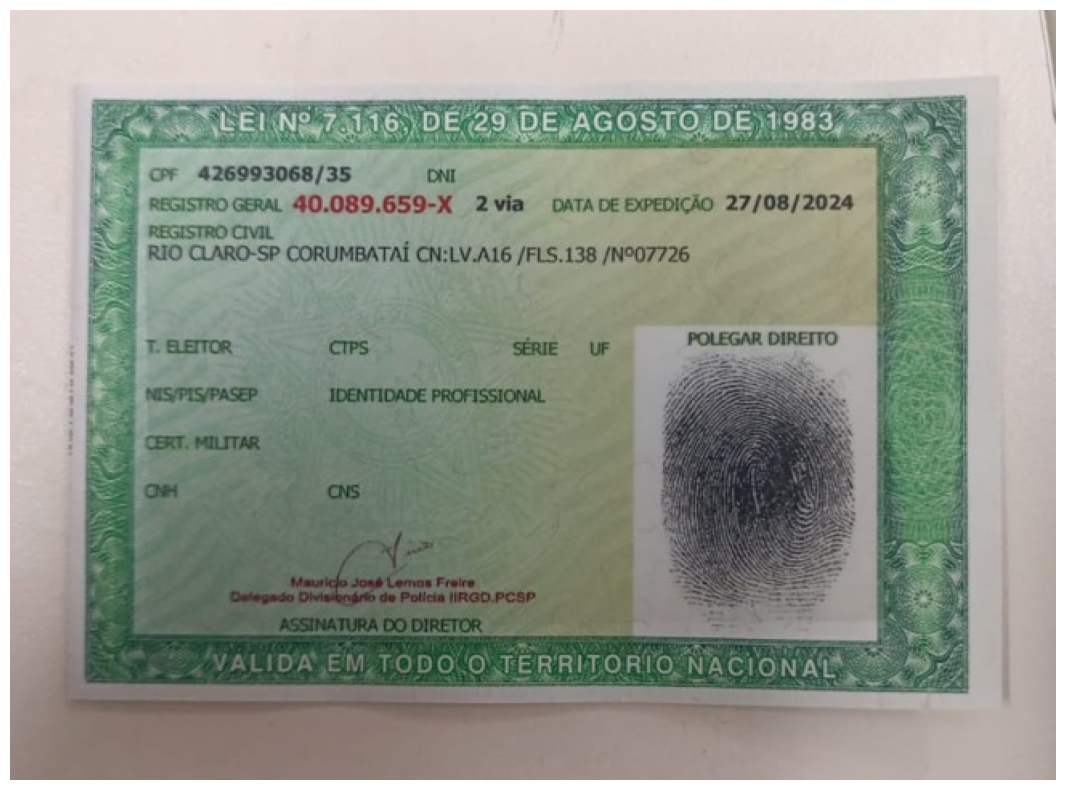

480 652


In [ ]:
# Lê a imagem a partir do caminho especificado no formato padrão do OpenCV (BGR).
#img = cv2.imread('/content/drive/MyDrive/Mestrado/Unesp/Disciplinas/Aprendizado Profundo/Aprendizado Profundo Tema - (Visual Reasoning)/RG.jpg')
img = cv2.imread('/content/RG.jpg')

# Cria uma cópia da imagem original para preservar a versão inicial.
original = img.copy()

# Chama a função mostrar para exibir a imagem carregada.
mostrar(img)

# Obtém as dimensões da imagem (altura H e largura W) a partir do atributo shape.
# shape[:2] retorna as duas primeiras dimensões: altura (H) e largura (W).
(H, W) = img.shape[:2]

# Imprime as dimensões da imagem (altura e largura).
print(H, W)


## Conversão para tons de cinza (*grayscale*)

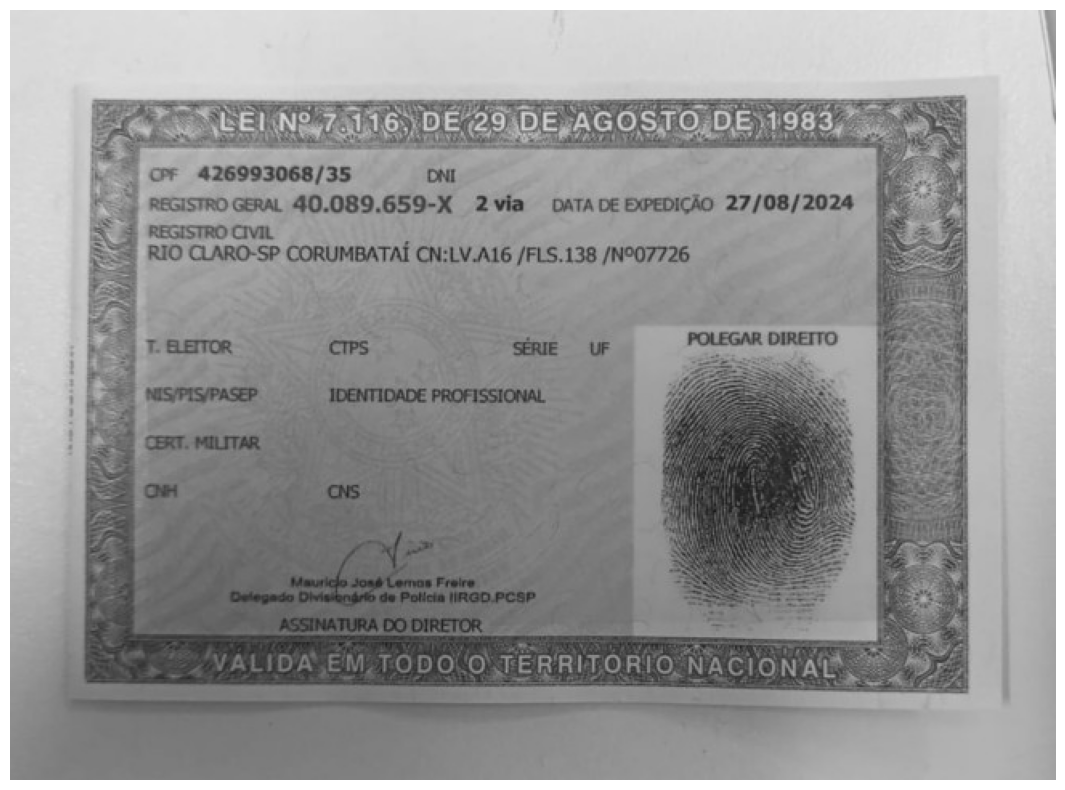

In [ ]:
# Converte a imagem original de BGR (padrão do OpenCV) para tons de cinza.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Exibe a imagem em tons de cinza usando a função 'mostrar'.
mostrar(gray)


## Aplicação de desfoque (*Gaussian Blur*)

In [ ]:
# Aplica um desfoque gaussiano à imagem em tons de cinza.
# O kernel de tamanho (5, 5) é usado para suavizar a imagem.
# O parâmetro sigmaX (último argumento) é definido como 0, para que o OpenCV calcule automaticamente.
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Exibe a imagem suavizada (desfocada) usando a função 'mostrar'.
mostrar(blur)


## Detecção de bordas (*Canny Edge*)

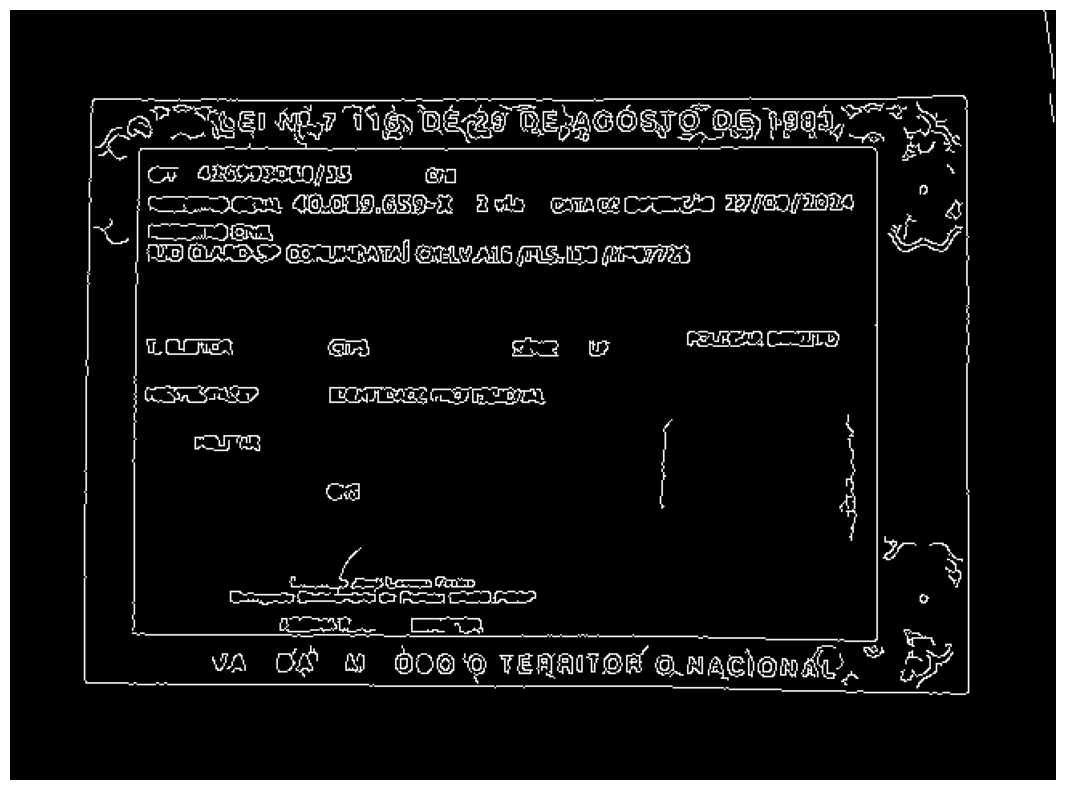

In [ ]:
# Aplica o detector de bordas Canny na imagem suavizada (blur).
# Os parâmetros 60 e 160 definem os limiares inferior e superior para a detecção de bordas.
edged = cv2.Canny(blur, 60, 160)

# Exibe a imagem resultante com as bordas detectadas.
mostrar(edged)


# Detecção de contornos na imagem

In [ ]:
def encontrar_contornos(img):
    # Encontra os contornos na imagem.
    # cv2.RETR_LIST: Recupera todos os contornos encontrados sem organizar hierarquicamente.
    # cv2.CHAIN_APPROX_SIMPLE: Armazena apenas os pontos essenciais dos contornos, economizando memória.
    conts = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Ajusta a saída de findContours para ser compatível com diferentes versões do OpenCV.
    conts = imutils.grab_contours(conts)

    # Ordena os contornos por área em ordem decrescente (maiores primeiro).
    # Pega apenas os 6 maiores contornos.
    conts = sorted(conts, key=cv2.contourArea, reverse=True)[:6]

    # Retorna os contornos processados.
    return conts


In [ ]:
# Chama a função 'encontrar_contornos', passando uma cópia da imagem de bordas (edged).
# Isso garante que a imagem original de bordas não seja alterada durante o processamento.
# A função retorna os contornos mais significativos encontrados na imagem (até 6 maiores).
conts = encontrar_contornos(edged.copy())


## Localizando o maior contorno

- Douglas-Peucker: http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm

In [ ]:
# Percorre cada contorno encontrado na lista 'conts'.
for c in conts:
    # Calcula o perímetro do contorno.
    # O segundo argumento (True) indica que o contorno é fechado.
    perimetro = cv2.arcLength(c, True)

    # Aproxima o contorno a uma forma poligonal com menos vértices.
    # A precisão da aproximação é definida como 2% do perímetro do contorno.
    aproximacao = cv2.approxPolyDP(c, 0.02 * perimetro, True)

    # Verifica se o contorno aproximado tem exatamente 4 vértices.
    # Isso indica que o contorno é possivelmente um quadrilátero.
    if len(aproximacao) == 4:
        # Se encontrar um contorno com 4 vértices, o armazena na variável 'maior'.
        maior = aproximacao

        # Sai do loop, pois já encontrou o contorno desejado.
        break

In [ ]:
# Desenha o contorno 'maior' na imagem original 'img'.
# O argumento -1 indica que todos os contornos serão desenhados (no caso, é apenas um).
# A cor do contorno é definida como (120, 255, 0) (verde em formato BGR).
# A espessura do contorno é definida como 28 pixels.
cv2.drawContours(img, maior, -1, (120, 255, 0), 28)

# Desenha novamente o contorno 'maior' na imagem, mas desta vez como uma lista de contornos.
# A cor do contorno é a mesma, mas a espessura é reduzida para 2 pixels.
cv2.drawContours(img, [maior], -1, (120, 255, 0), 2)

# Exibe a imagem modificada com os contornos desenhados usando a função 'mostrar'.
mostrar(img)

## Ordenando os pontos

Nós ja temos as 4 coordenadas x-y que correspondem aos cantos do retângulo/polígono localizado na imagem, porém esses pontos provavelmente estarão fora de uma ordem. Para fazer a transformação de perspectiva precisamos ordenar os pontos, de modo que eles fiquem em uma ordem padrão e assim seja possível aplicar a transformação.

É crucial que a ordem dos pontos do retângulo esteja consistente em todo o programa. Pois caso mude de ordem algum desses pontos a transformação não vai ficar da forma que queremos.

Nós escolhemos essa ordem:

1. **te** = topo esquerdo (superior esquerdo)
2. **td** = topo direito (superior direito)
3. **bd** = baixo direito (inferior direito)
4. **be** = baixo esquerdo (inferior esquerdo)

Preferimos deixar nessa ordem por ser um padrão mais utilizado. Você poderia se quiser mudar a ordem, deixar por exemplo `be` antes de `bd` e após `td`, só que se for fazer assim precisa manter essa ordem no restante do programa (especificamente na parte do pts2 que veremos abaixo, trocando o [W, H] por [0, H])

In [ ]:
def ordenar_pontos(pontos):
    # Reorganiza os pontos fornecidos para formar uma matriz 4x2 (quatro pontos, cada um com coordenadas x e y).
    pontos = pontos.reshape((4, 2))

    # Cria uma nova matriz para armazenar os pontos ordenados.
    # A forma final será 4x1x2 (compatível com OpenCV), com valores inteiros de 32 bits.
    pontos_novos = np.zeros((4, 1, 2), dtype=np.int32)

    # Soma as coordenadas x e y de cada ponto.
    add = pontos.sum(1)

    # O ponto com a menor soma (x + y) será o canto superior esquerdo.
    pontos_novos[0] = pontos[np.argmin(add)]

    # O ponto com a maior soma (x + y) será o canto inferior direito.
    pontos_novos[2] = pontos[np.argmax(add)]

    # Calcula a diferença entre as coordenadas x e y de cada ponto.
    dif = np.diff(pontos, axis=1)

    # O ponto com a menor diferença (x - y) será o canto superior direito.
    pontos_novos[1] = pontos[np.argmin(dif)]

    # O ponto com a maior diferença (x - y) será o canto inferior esquerdo.
    pontos_novos[3] = pontos[np.argmax(dif)]

    # Retorna os pontos ordenados como uma matriz 4x1x2.
    return pontos_novos


In [ ]:
# Ordena os pontos do quadrilátero armazenado em 'maior' usando a função 'ordenar_pontos'.
# Isso garante que os pontos sejam organizados em uma ordem consistente:
# - Canto superior esquerdo
# - Canto superior direito
# - Canto inferior direito
# - Canto inferior esquerdo
pontos_maior = ordenar_pontos(maior)

# Imprime os pontos ordenados do quadrilátero na saída.
print(pontos_maior)


[[[ 52  55]]

 [[595  54]]

 [[597 425]]

 [[ 47 419]]]


## Obtenção da matriz de transformação

In [ ]:
# Converte os pontos ordenados do quadrilátero ('pontos_maior') para o formato de ponto flutuante (float32).
# Isso é necessário para algumas operações do OpenCV, como transformações de perspectiva,
# que requerem coordenadas no formato float.
pts1 = np.float32(pontos_maior)


In [ ]:
# Exibe os valores de altura (H) e largura (W) da imagem, que foram previamente calculados.
# H representa a altura (número de linhas na imagem).
# W representa a largura (número de colunas na imagem).
print(H, W)


480 652


In [ ]:
# Define os pontos de destino (pts2) para uma transformação de perspectiva.
# Esses pontos representam as coordenadas de um retângulo em uma imagem com dimensões W (largura) e H (altura).
# O formato float32 é necessário para operações do OpenCV.
pts2 = np.float32([[0, 0], [W, 0], [W, H], [0, H]])


In [ ]:
# Calcula a matriz de transformação de perspectiva que mapeia os pontos de origem (pts1) para os pontos de destino (pts2).
# Essa matriz 3x3 é usada para realizar a transformação de perspectiva.
matriz = cv2.getPerspectiveTransform(pts1, pts2)

# Exibe a matriz de transformação de perspectiva calculada.
matriz


array([[ 1.22825666e+00,  1.68716574e-02, -6.47972875e+01],
       [ 2.46906477e-03,  1.34070217e+00, -7.38670106e+01],
       [ 3.52233818e-05,  3.58423054e-05,  1.00000000e+00]])

## Transformação de perspectiva

In [ ]:
# Aplica a transformação de perspectiva à imagem original.
# 'original': imagem que será transformada.
# 'matriz': matriz de transformação de perspectiva calculada anteriormente.
# '(W, H)': define o tamanho da imagem resultante (largura W e altura H).
transform = cv2.warpPerspective(original, matriz, (W, H))

In [ ]:
# Exibe a imagem transformada (retificada) usando a função personalizada 'mostrar'.
# A função converte a imagem de BGR para RGB e remove os eixos antes de exibi-la.
mostrar(transform)


# OCR com Tesseract

In [ ]:
# Instala o Tesseract OCR no ambiente.
# Tesseract é um mecanismo de OCR (Reconhecimento Óptico de Caracteres) que converte imagens em texto.
!sudo apt install tesseract-ocr
# Instala a biblioteca Python 'pytesseract'.
# Esta biblioteca funciona como uma interface para o Tesseract OCR, permitindo usá-lo diretamente em Python.
!pip install pytesseract
# Importa a biblioteca 'pytesseract', que será usada para realizar OCR em imagens.
import pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Cria um diretório chamado 'tessdata' no local atual para armazenar os arquivos de treinamento do Tesseract.
!mkdir tessdata
# Faz o download do arquivo de treinamento do idioma português (por.traineddata) e o salva na pasta 'tessdata'.
# O arquivo é baixado diretamente do repositório oficial do Tesseract no GitHub.
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata?raw=true


mkdir: cannot create directory ‘tessdata’: File exists
--2024-11-23 17:50:09--  https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata [following]
--2024-11-23 17:50:09--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./tessdata/por.traineddata’

./tessdata/por.trai     [ <=>                ] 294.83K  --.-KB/s    in 0.03s   

2024-11-23 17:50:10 (9.24 MB/s) - ‘./tessdata/por.traineddata’ saved [301907]



In [ ]:
# Instala o pacote de idioma português para o Tesseract OCR no sistema.
!sudo apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Define o caminho para o diretório de dados do Tesseract onde os arquivos de treinamento de idiomas estão localizados.
# A primeira linha está comentada porque é usada se o arquivo 'por.traineddata' estiver em um diretório personalizado (ex.: 'tessdata' local).
# config_tesseract = "--tessdata-dir tessdata"

# Usa o diretório padrão onde o Tesseract armazena os arquivos de treinamento do sistema.
config_tesseract = "--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata"

# Executa o OCR na imagem 'transform', especificando o idioma como português (lang="por").
# Inclui a configuração 'config_tesseract' para apontar o diretório de dados do Tesseract.
texto = pytesseract.image_to_string(transform, lang="por", config=config_tesseract)

# Exibe o texto extraído da imagem.
print(texto)


or 426993068/35 ONE
REGISTRO GERAL 40,089.659-X 2via DATA DE EXPEDIÇÃO 27/08/2024
REGISTRO CIVIL

É RIO CLARO-SP CORUMBATAÍ CN:LV.AI6 /FLS.138 /Nº07726

 



In [ ]:
# Redimensiona a imagem 'transform' para aumentar o tamanho, facilitando a leitura pelo OCR.
# 'fx=1.5' e 'fy=1.5' aumentam a largura e altura em 1.5 vezes, respectivamente.
# 'interpolation=cv2.INTER_CUBIC' usa interpolação cúbica, adequada para redimensionar imagens com boa qualidade.
maior = cv2.resize(transform, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

# Executa o OCR na imagem redimensionada 'maior', usando o idioma português.
texto = pytesseract.image_to_string(maior, lang="por", config=config_tesseract)

# Executa novamente o OCR na imagem redimensionada, caso a leitura precise ser armazenada separadamente.
# Isso pode ser redundante se os textos esperados forem iguais.
texto2 = pytesseract.image_to_string(maior, lang="por", config=config_tesseract)

# Exibe o texto extraído da imagem na saída.
print(texto)


 
     
   
 
   

 

or 426993068/35 ONI
REGISTRO GERAL 40.089.659-X 2via DATA DE EXPEDIÇÃO 27/08/2024

& REGISTRO Civil
* RIO CLARO-SP CORUMBATAÍ CN:LV.AL6 /FLS.138 /Nº07726

 

SÉRIE UF



In [ ]:
"Este é um exemplo de texto extraído da imagem. O Tesseract OCR interpreta os caracteres e os transforma em texto."
texto

' \n     \n   \n \n   \n\n \n\nor 426993068/35 ONI\nREGISTRO GERAL 40.089.659-X 2via DATA DE EXPEDIÇÃO 27/08/2024\n\n& REGISTRO Civil\n* RIO CLARO-SP CORUMBATAÍ CN:LV.AL6 /FLS.138 /Nº07726\n\n \n\nSÉRIE UF\n\x0c'

In [ ]:
import re

# O texto extraído da imagem pelo Tesseract é armazenado na variável 'texto'.
# Aqui, estamos reutilizando a variável 'texto' já existente.
texto = texto

# Usando uma expressão regular para encontrar todos os dígitos individuais no texto.
# O padrão '\d' corresponde a qualquer caractere numérico (0-9).
digitos = re.findall(r'\d', texto)

# Converte os dígitos encontrados (que estão como strings) para inteiros usando map().
# Cada elemento da lista é convertido de string para inteiro.
digitos_inteiros = list(map(int, digitos))

# Exibindo os dígitos extraídos como strings.
print("Dígitos extraídos:", digitos)

# Exibindo os dígitos convertidos para inteiros.
print("Dígitos como inteiros:", digitos_inteiros)

# Armazena os dígitos extraídos como strings em 'texto2'.
texto2 = digitos

Dígitos extraídos: ['4', '2', '6', '9', '9', '3', '0', '6', '8', '3', '5', '4', '0', '0', '8', '9', '6', '5', '9', '2', '2', '7', '0', '8', '2', '0', '2', '4', '6', '1', '3', '8', '0', '7', '7', '2', '6']
Dígitos como inteiros: [4, 2, 6, 9, 9, 3, 0, 6, 8, 3, 5, 4, 0, 0, 8, 9, 6, 5, 9, 2, 2, 7, 0, 8, 2, 0, 2, 4, 6, 1, 3, 8, 0, 7, 7, 2, 6]


In [ ]:
import re

# Definindo o texto extraído pelo Tesseract (presume-se que a variável 'texto' já exista com o conteúdo processado).
texto = texto

# Usando expressões regulares para encontrar todos os dígitos no texto.
# '\d' encontra todos os caracteres numéricos, e 'findall' retorna uma lista com eles.
digitos = re.findall(r'\d', texto)

# Converte os dígitos (que estão como strings) em inteiros usando map().
digitos_inteiros = list(map(int, digitos))

# Dividindo os dígitos extraídos em diferentes categorias:

# CPF: Seleciona os 11 primeiros dígitos.
CPF = digitos_inteiros[:11]

# RG: Seleciona do 12º ao 19º dígito.
RG = digitos_inteiros[11:19]

# DT: Seleciona os dígitos do 20º ao 28º (ajustado para considerar todos os 9 dígitos esperados).
DT = digitos_inteiros[20:28]

# Exibindo os resultados das categorias de dígitos.
print("CPF:", CPF)  # Os 11 dígitos que representam o CPF.
print("RG:", RG)    # Os próximos 8 dígitos que representam o RG.
print("DT:", DT)    # Os 8 dígitos que representam a data (DT).


CPF: [4, 2, 6, 9, 9, 3, 0, 6, 8, 3, 5]
RG: [4, 0, 0, 8, 9, 6, 5, 9]
DT: [2, 7, 0, 8, 2, 0, 2, 4]


##CHATBOT

In [ ]:
!pip install gradio


In [ ]:
import re
import gradio as gr
from datetime import datetime  # Para trabalhar com datas.
from transformers import pipeline

# Vetores de dígitos simulando extração de texto de documentos.
CPF = CPF    # Lista de 11 dígitos representando um CPF.
RG = RG      # Lista de 8 dígitos representando um RG.
DT = DT      # Lista de 8 dígitos representando a data de emissão do RG.

# Concatenando os vetores de CPF, RG e DT em strings.
texto = ''.join(map(str, CPF))  # Converte a lista de inteiros CPF em uma string contínua.
texto2 = ''.join(map(str, RG))  # Faz o mesmo para o vetor RG.
texto_dt = ''.join(map(str, DT))  # Faz o mesmo para a data de emissão.

# Carregando o modelo de perguntas e respostas da biblioteca Transformers.
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

# Mensagem inicial para orientar o usuário.
mensagem_inicial = "Deseja validar RG e CPF? Se sim, digite 'RG' para RG e 'CPF' para CPF."

# Função para calcular a validade do RG.
def verificar_validade_rg(data_emissao):
    # Converter a data de emissão para um objeto datetime.
    data_emissao = datetime.strptime(data_emissao, "%d%m%Y")  # Formato esperado: DDMMYYYY.

    # Obter a data atual.
    data_atual = datetime.now()

    # Calcular a diferença em anos entre a data atual e a data de emissão.
    diferenca_anos = (data_atual - data_emissao).days / 365.25  # Converte dias em anos.

    # Verificar validade: RG válido se tiver menos de 10 anos.
    if diferenca_anos < 10:
        return "O RG está válido."
    else:
        return "O RG está inválido (mais de 10 anos)."

# Função para validar RG ou CPF com base em uma pergunta do usuário.
def answer_question(question):
    global texto, texto2, texto_dt

    if question.lower() in ["sim", "s"]:
        return mensagem_inicial

    elif question.lower() == "cpf":
        numeros_encontrados = re.findall(r'\d', texto)
        if len(numeros_encontrados) == 11:
            return f"Ok, isto é um CPF válido: {texto}"
        else:
            return "O vetor não corresponde a um CPF válido."

    elif question.lower() == "rg":
        numeros_encontrados2 = re.findall(r'\d', texto2)
        if 7 <= len(numeros_encontrados2) <= 8:
            validade_rg = verificar_validade_rg(texto_dt)
            return f"Ok, isto é um RG válido: {texto2}. {validade_rg}"
        else:
            return "O vetor não corresponde a um RG válido."

    else:
        return "Você digitou errado."

# Criando a interface do Gradio.
with gr.Blocks() as app:
    # Campo de entrada para o usuário digitar perguntas.
    question_input = gr.Textbox(label="Digite sua pergunta")

    # Campo de saída para exibir respostas do chatbot.
    answer_output = gr.Textbox(label="Resposta do chatbot", interactive=False)

    # Define a mensagem inicial como valor inicial da saída.
    answer_output.value = mensagem_inicial

    # Configura o campo de entrada para processar perguntas e exibir respostas.
    question_input.submit(answer_question, inputs=question_input, outputs=answer_output)

# Inicia a aplicação.
app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c721dcd360ccbc9ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## outros CHAT
---------------


In [ ]:
# Importa a biblioteca Gradio, que permite criar interfaces interativas de forma simples.
import gradio as gr

# Importa a função pipeline da biblioteca Transformers para carregar modelos pré-treinados.
from transformers import pipeline

# Define o texto de contexto que será usado para responder às perguntas.
# Aqui, 'texto2' deve conter uma string que serve como base para o pipeline de perguntas e respostas.
texto = texto2

# Carrega um pipeline de perguntas e respostas usando um modelo pré-treinado.
# "distilbert-base-uncased-distilled-squad" é um modelo leve e eficiente para tarefas de QA (Question Answering).
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

# Define uma função que responde a perguntas com base no contexto fornecido.
def answer_question(question):
    if texto:  # Verifica se o texto de contexto foi fornecido.
        # Usa o pipeline de perguntas e respostas para obter a resposta.
        # A função recebe uma pergunta e o contexto (texto) para gerar uma resposta.
        result = qa_pipeline(question=question, context=texto)
        # Retorna a resposta gerada pelo modelo.
        return result["answer"]
    else:
        # Caso nenhum texto de contexto tenha sido definido, retorna uma mensagem informativa.
        return "Nenhum texto de contexto foi fornecido."

# Cria a interface do usuário usando Gradio.
with gr.Blocks() as app:
    # Cria um campo de entrada de texto onde o usuário pode digitar uma pergunta.
    question_input = gr.Textbox(label="Digite sua pergunta")

    # Cria um campo de saída para exibir a resposta do chatbot.
    # O campo não é interativo, pois apenas exibe as respostas.
    answer_output = gr.Textbox(label="Resposta do chatbot", interactive=False)

    # Configura o envio de perguntas e geração de respostas.
    # Quando o usuário envia uma pergunta, a função 'answer_question' é chamada.
    # A entrada do usuário ('question_input') é processada e a resposta é exibida no campo 'answer_output'.
    question_input.submit(answer_question, inputs=question_input, outputs=answer_output)

# Inicia a aplicação Gradio, abrindo uma interface no navegador.
app.launch()

ModuleNotFoundError: No module named 'gradio'